In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

In [2]:
print(os.getcwd())
# inorder to change directory for direct upload
#os.chdir("C:\Users\harsh\OneDrive\Documents\ML\ML2")

C:\Users\harsh


In [3]:
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image 
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [6]:
iris = datasets.load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Categorical.from_codes(iris.target, iris.target_names)
y_iris = pd.get_dummies(y_iris)

In [7]:
X_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y_iris

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,test_size=0.2,random_state=1)

In [10]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
d_tree_rules = tree.export_text(d_tree)
print(d_tree_rules)

|--- feature_2 <= 2.60
|   |--- class: 1
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 0
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_1 <= 2.85
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  2.85
|   |   |   |   |   |--- class: 0
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 0



In [12]:
with open("d_tree.log", "w") as fout:
    fout.write(d_tree_rules)

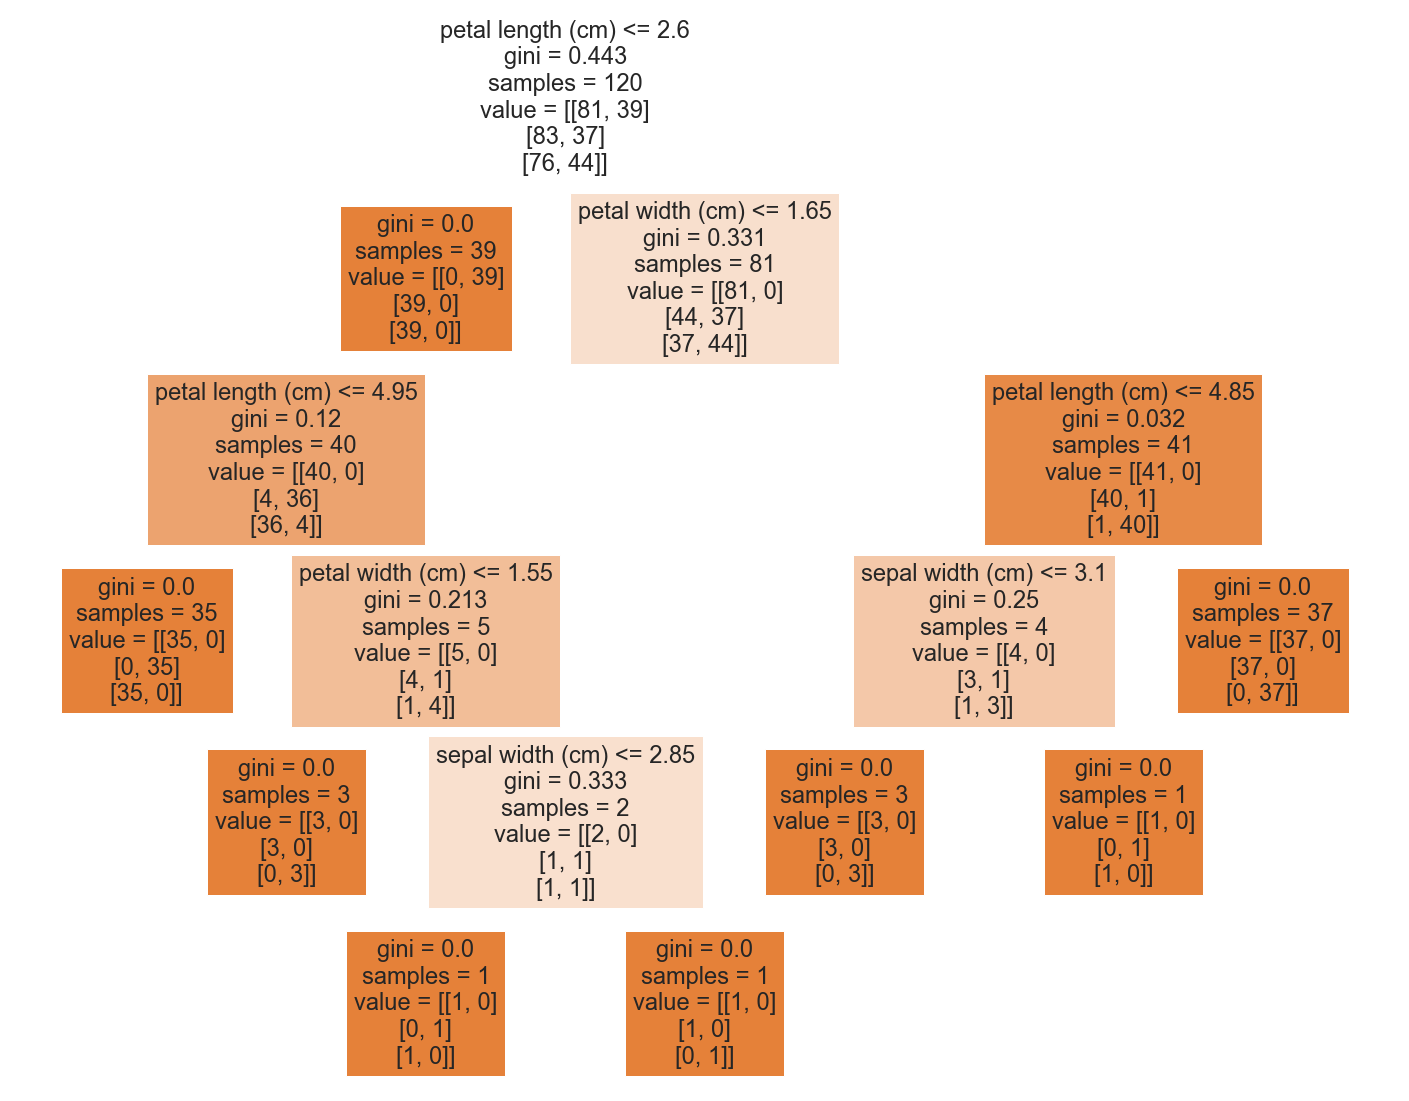

In [13]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(d_tree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [14]:
train_pred = d_tree.predict(X_train)
species_train = np.array(y_train).argmax(axis=1)
predictions_train = np.array(train_pred).argmax(axis=1)
confusion_matrix(species_train, predictions_train)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 44]], dtype=int64)

In [15]:
test_pred = d_tree.predict(X_test)
species_test = np.array(y_test).argmax(axis=1)
predictions_test = np.array(test_pred).argmax(axis=1)
confusion_matrix(species_test, predictions_test)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [16]:
d_tree.score(X_test, y_test)

0.9666666666666667